In [58]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [59]:
from fastai.imports import *

In [60]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [61]:
PATH = "../../../data/stanislav_data2/"
sz=224
bs=2

In [62]:
torch.cuda.is_available()

True

In [63]:
#GETDATA

In [64]:
os.listdir(PATH)

['valid', 'models', 'train', 'tmp']

In [65]:
os.listdir(f'{PATH}train/mesto')

['3789846_smichov-city-sekyra-group-vystavba-developersky-projekt-v0.jpg',
 '010_drawin-copya.jpg',
 '20170629170520_Y3j0Y1_full.jpg',
 'pacc_nutter_2008.jpg',
 'UNADJUSTEDNONRAW_thumb_3c8.jpg',
 'a0b4b5f7_z.jpg',
 'UNADJUSTEDNONRAW_thumb_32d.jpg',
 'UNADJUSTEDNONRAW_thumb_5c.jpg',
 '1200px-Ohmann_Assicurazioni_Generali_Prague.JPG']

In [66]:
os.listdir(f'{PATH}valid/les')

['pexels-photo-675949.jpeg',
 'GP0STR1W3_Medium_res_with_credit_line.jpg',
 'UNADJUSTEDNONRAW_thumb_4e5.jpg',
 'SIERRA Forests WB.jpeg',
 'forest-day.jpg',
 'lat.jpg',
 'images.jpeg']

In [67]:
files = os.listdir(f'{PATH}valid/les')[:5]

In [68]:
img = plt.imread(f'{PATH}valid/les/{files[1]}')

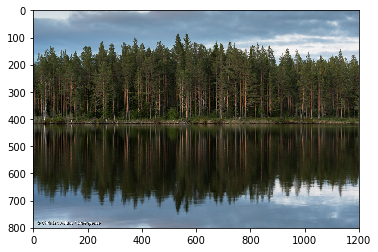

In [69]:
plt.imshow(img)

In [70]:
img.shape

(801, 1200, 3)

In [71]:
img[:4][:4]

array([[[205, 216, 222],
        [205, 216, 222],
        [206, 217, 223],
        ...,
        [113, 137, 161],
        [113, 137, 161],
        [113, 137, 161]],

       [[205, 216, 222],
        [205, 216, 222],
        [206, 217, 223],
        ...,
        [113, 137, 161],
        [113, 137, 161],
        [112, 136, 160]],

       [[204, 215, 221],
        [205, 216, 222],
        [205, 216, 222],
        ...,
        [112, 136, 160],
        [112, 136, 160],
        [112, 136, 160]],

       [[205, 216, 222],
        [206, 217, 223],
        [206, 217, 223],
        ...,
        [112, 136, 160],
        [112, 136, 160],
        [111, 135, 159]]], dtype=uint8)

In [72]:
#MODEL

In [73]:
arch = resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch,sz),bs=bs)

In [74]:
learn = ConvLearner.pretrained(arch,data,precompute=True)
learn.fit(0.01,2)

epoch      trn_loss   val_loss   accuracy        
    0      0.652846   0.883771   0.785714  
    1      0.956796   0.173207   0.928571        



[array([0.17321]), 0.9285714285714286]

In [75]:
#EVALUACE

In [76]:
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [77]:
data.trn_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [78]:
data.classes

['les', 'mesto']

In [79]:
log_preds = learn.predict()

In [80]:
log_preds.shape

(14, 2)

In [81]:
len(data.val_y)

14

In [82]:
log_preds[:5]

array([[-0.10896, -2.27074],
       [-0.1515 , -1.96194],
       [-0.52161, -0.90033],
       [-0.99449, -0.4619 ],
       [-0.46132, -0.99548]], dtype=float32)

In [83]:
preds = np.argmax(log_preds,axis=1)
probs = np.exp(log_preds[:,1])

In [84]:
preds

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [85]:
probs

array([0.10324, 0.14059, 0.40644, 0.63009, 0.36955, 0.06871, 0.09462, 1.     , 0.99959, 1.     , 1.     ,
       0.9994 , 0.98472, 0.99999], dtype=float32)

In [86]:
log_preds

array([[ -0.10896,  -2.27074],
       [ -0.1515 ,  -1.96194],
       [ -0.52161,  -0.90033],
       [ -0.99449,  -0.4619 ],
       [ -0.46132,  -0.99548],
       [ -0.07119,  -2.67779],
       [ -0.0994 ,  -2.35793],
       [-17.65989,   0.     ],
       [ -7.80308,  -0.00041],
       [-16.05055,   0.     ],
       [-13.55529,  -0.     ],
       [ -7.42026,  -0.0006 ],
       [ -4.18124,  -0.0154 ],
       [-11.10267,  -0.00001]], dtype=float32)

In [87]:
np.argmax(log_preds,axis=1)

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [88]:
log_preds[:,1]

array([-2.27074, -1.96194, -0.90033, -0.4619 , -0.99548, -2.67779, -2.35793,  0.     , -0.00041,  0.     ,
       -0.     , -0.0006 , -0.0154 , -0.00001], dtype=float32)

In [89]:
from sklearn.metrics import confusion_matrix, classification_report

In [90]:
print(confusion_matrix(data.val_y,preds))
print('------------------------')
print(classification_report(data.val_y,preds))

[[6 1]
 [0 7]]
------------------------
             precision    recall  f1-score   support

          0       1.00      0.86      0.92         7
          1       0.88      1.00      0.93         7

avg / total       0.94      0.93      0.93        14



In [91]:
log_preds[:,1]

array([-2.27074, -1.96194, -0.90033, -0.4619 , -0.99548, -2.67779, -2.35793,  0.     , -0.00041,  0.     ,
       -0.     , -0.0006 , -0.0154 , -0.00001], dtype=float32)

In [92]:
probs

array([0.10324, 0.14059, 0.40644, 0.63009, 0.36955, 0.06871, 0.09462, 1.     , 0.99959, 1.     , 1.     ,
       0.9994 , 0.98472, 0.99999], dtype=float32)

In [93]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [94]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [95]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')

Correct


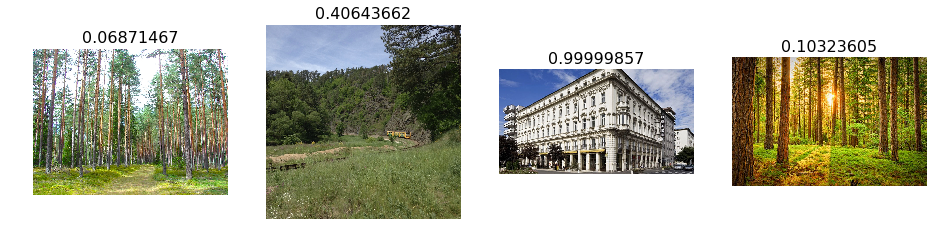

In [96]:
plot_val_with_title(rand_by_correct(True),'Correct')

In [97]:
plot_val_with_title(rand_by_correct(False),'Incorrect')

ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

In [ ]:
plot_val_with_title(most_by_correct(0, True), "Most correct les")

In [ ]:
plot_val_with_title(most_by_correct(1, True), "Most correct mesto")

In [ ]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect les")

In [ ]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect mesto")

In [ ]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

In [ ]:
# CHOOSING A LEARNING RATE

In [ ]:
arch = resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch,sz),bs=bs)

In [ ]:
learn2 = ConvLearner.pretrained(arch,data,precompute=True)

In [ ]:
lrf = learn2.lr_find()

In [ ]:
learn2.sched.plot_lr()

In [ ]:
learn2.sched.plot()